# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 

# Confidence Interval

In [48]:
Population_N = 100000
Sample_size= 10000
Num_of_samples = 500



In [ ]:
population_value = np.random.random_sample((Population_N))
consolidated_sample_sets = []

for single_sample_set in range(Num_of_samples) :
    random_seed = np.random.randint(0,Num_of_samples*2)
    np.random.seed( random_seed )
    random_sub_sample = np.random.choice(population_value, size=Sample_size)
    consolidated_sample_sets.append(random_sub_sample) 


dataframe = pd.DataFrame(consolidated_sample_sets)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.923703,0.119770,0.298924,0.342402,0.656140,0.437391,0.624156,0.061573,0.066054,0.713041,...,0.829339,0.624758,0.665541,0.167138,0.892705,0.688988,0.287970,0.388760,0.254926,0.795029
1,0.310837,0.466489,0.144703,0.799329,0.896547,0.353637,0.291501,0.600795,0.210326,0.334021,...,0.583420,0.735991,0.403239,0.330565,0.040591,0.543004,0.459920,0.812380,0.634398,0.677931
2,0.183867,0.171264,0.629122,0.859674,0.453714,0.122077,0.690761,0.336716,0.869471,0.986134,...,0.577278,0.075149,0.039996,0.894695,0.505471,0.526924,0.849652,0.201044,0.871199,0.273726
3,0.017006,0.811618,0.798733,0.126755,0.015845,0.393174,0.677357,0.840761,0.929932,0.834818,...,0.512838,0.716975,0.714473,0.857217,0.517585,0.294454,0.920347,0.001167,0.687761,0.234325
4,0.395622,0.241583,0.418534,0.243035,0.656225,0.637843,0.215341,0.579977,0.596288,0.743124,...,0.488895,0.282173,0.197088,0.671468,0.235549,0.639547,0.500339,0.276214,0.550717,0.736772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.531196,0.631455,0.764887,0.891113,0.232590,0.732728,0.019258,0.516921,0.613976,0.657258,...,0.761780,0.967016,0.156093,0.057815,0.782874,0.926519,0.902831,0.435466,0.751584,0.549050
4996,0.132906,0.742146,0.615242,0.741926,0.861049,0.504178,0.493981,0.304084,0.829785,0.568431,...,0.862970,0.318171,0.422374,0.298915,0.117541,0.839256,0.184603,0.111679,0.139860,0.384095
4997,0.226331,0.417063,0.646421,0.603509,0.906500,0.084737,0.755710,0.350155,0.153211,0.188270,...,0.715045,0.981438,0.153538,0.936354,0.898351,0.350604,0.244932,0.279489,0.052805,0.217913
4998,0.496594,0.748407,0.960797,0.753633,0.733530,0.269334,0.227940,0.055721,0.509931,0.355239,...,0.265634,0.947083,0.584779,0.092308,0.170230,0.463616,0.239677,0.135988,0.856891,0.830713


In [ ]:
population_mean = np.mean(population_value)
population_mean 

0.5007652652794495

In [ ]:
## calculating mean of all the samples form individual independent distributions 
dataframe['rows_sum'] = dataframe.sum(axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,rows_sum
0,0.923703,0.119770,0.298924,0.342402,0.656140,0.437391,0.624156,0.061573,0.066054,0.713041,...,0.624758,0.665541,0.167138,0.892705,0.688988,0.287970,0.388760,0.254926,0.795029,494.075453
1,0.310837,0.466489,0.144703,0.799329,0.896547,0.353637,0.291501,0.600795,0.210326,0.334021,...,0.735991,0.403239,0.330565,0.040591,0.543004,0.459920,0.812380,0.634398,0.677931,508.416176
2,0.183867,0.171264,0.629122,0.859674,0.453714,0.122077,0.690761,0.336716,0.869471,0.986134,...,0.075149,0.039996,0.894695,0.505471,0.526924,0.849652,0.201044,0.871199,0.273726,501.762918
3,0.017006,0.811618,0.798733,0.126755,0.015845,0.393174,0.677357,0.840761,0.929932,0.834818,...,0.716975,0.714473,0.857217,0.517585,0.294454,0.920347,0.001167,0.687761,0.234325,512.537073
4,0.395622,0.241583,0.418534,0.243035,0.656225,0.637843,0.215341,0.579977,0.596288,0.743124,...,0.282173,0.197088,0.671468,0.235549,0.639547,0.500339,0.276214,0.550717,0.736772,506.478672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.531196,0.631455,0.764887,0.891113,0.232590,0.732728,0.019258,0.516921,0.613976,0.657258,...,0.967016,0.156093,0.057815,0.782874,0.926519,0.902831,0.435466,0.751584,0.549050,501.414883
4996,0.132906,0.742146,0.615242,0.741926,0.861049,0.504178,0.493981,0.304084,0.829785,0.568431,...,0.318171,0.422374,0.298915,0.117541,0.839256,0.184603,0.111679,0.139860,0.384095,496.929284
4997,0.226331,0.417063,0.646421,0.603509,0.906500,0.084737,0.755710,0.350155,0.153211,0.188270,...,0.981438,0.153538,0.936354,0.898351,0.350604,0.244932,0.279489,0.052805,0.217913,498.886701
4998,0.496594,0.748407,0.960797,0.753633,0.733530,0.269334,0.227940,0.055721,0.509931,0.355239,...,0.947083,0.584779,0.092308,0.170230,0.463616,0.239677,0.135988,0.856891,0.830713,496.737110


<Axes: xlabel='rows_sum', ylabel='Count'>

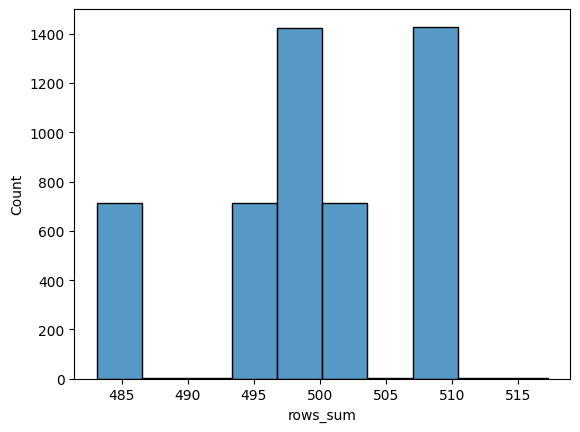

In [ ]:
sns.histplot(dataframe['rows_sum'],bins=10)

In [41]:
## converting the mean into standard normal distribution
sample_means_mean = np.mean(dataframe['rows_sum'])
sample_means_variance = np.var(dataframe['rows_sum'])


dataframe['stdzd_mean'] = (dataframe['rows_sum'] - sample_means_mean) 
dataframe['stdzd_mean'] = dataframe['stdzd_mean'] / sample_means_variance

dataframe

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,rows_sum,stdzd_mean
0,0.200946,0.639123,0.337600,0.885501,0.012915,0.096134,0.637444,0.485272,0.343246,0.178083,...,0.921439,0.859539,0.051693,0.268474,0.794185,0.407804,0.110578,0.526721,504.189997,0.062127
1,0.212473,0.003908,0.575606,0.576164,0.227611,0.822279,0.541069,0.766718,0.865916,0.356843,...,0.209161,0.764636,0.530889,0.639527,0.335329,0.027703,0.543155,0.949347,488.964171,-0.139323
2,0.749620,0.190661,0.116262,0.032304,0.474469,0.755075,0.272199,0.767641,0.992392,0.615294,...,0.674173,0.774030,0.162294,0.971773,0.437688,0.355905,0.766600,0.963803,478.293763,-0.280501
3,0.722249,0.400367,0.058271,0.948456,0.248681,0.659581,0.637497,0.445148,0.121311,0.817453,...,0.298558,0.526266,0.808210,0.330531,0.856120,0.193639,0.664588,0.134823,481.006368,-0.244611
4,0.702598,0.033586,0.875716,0.936834,0.111456,0.394810,0.910684,0.430434,0.360569,0.538389,...,0.046146,0.005675,0.459631,0.359802,0.934989,0.154016,0.921253,0.611481,508.691867,0.121691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.537857,0.814368,0.791971,0.780082,0.273044,0.943771,0.484510,0.854909,0.733314,0.675498,...,0.633124,0.549487,0.395285,0.666977,0.734322,0.890986,0.816557,0.229929,509.351839,0.130422
496,0.639475,0.223994,0.575543,0.509396,0.403631,0.916391,0.655209,0.526557,0.128460,0.188215,...,0.505766,0.469441,0.070035,0.296080,0.384374,0.749546,0.077562,0.259983,499.716676,0.002942
497,0.218927,0.894542,0.016435,0.181885,0.687736,0.954935,0.946901,0.294217,0.208351,0.835184,...,0.110730,0.539292,0.032155,0.600982,0.439559,0.718277,0.417290,0.653645,490.444454,-0.119737
498,0.612842,0.018909,0.580644,0.893216,0.475016,0.938671,0.829973,0.478297,0.403540,0.512646,...,0.075428,0.301007,0.234618,0.723617,0.411850,0.185895,0.546324,0.779867,507.206619,0.102040


<Axes: xlabel='stdzd_mean', ylabel='Count'>

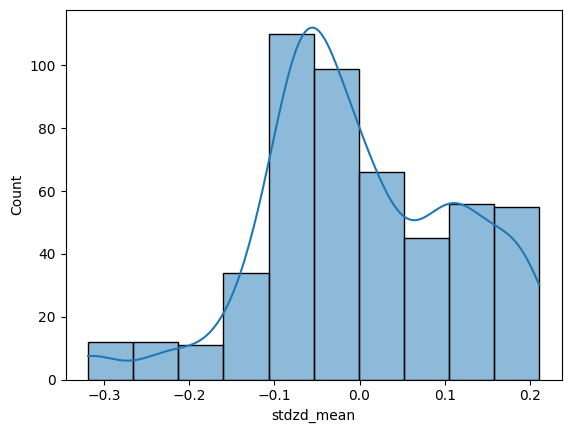

In [42]:
sns.histplot(dataframe['stdzd_mean'],bins=10,kde=True)